In [233]:
from pynq import Overlay, allocate
import matplotlib.pyplot as plt
import pynq_composable
import numpy as np
import time

In [252]:
ol = Overlay("measure_fifo2.bit")
cfilter = ol.filter
cfilter.c_dict

{'axis_data_fifo': {'si': [0],
  'dfx': False,
  'loaded': True,
  'modtype': 'axis_data_fifo',
  'mi': [0]},
 'axis_interface_0': {'si': [1],
  'dfx': False,
  'loaded': True,
  'modtype': 'axis_interface',
  'mi': [2]},
 'ps_in': {'dfx': False,
  'loaded': True,
  'modtype': 'axi_dma',
  'si': [3],
  'default': True,
  'fullpath': 'axi_dma'},
 'ps_out': {'mi': [1],
  'dfx': False,
  'loaded': True,
  'modtype': 'axi_dma',
  'default': True,
  'fullpath': 'axi_dma'}}

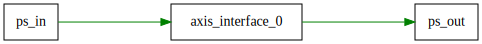

In [254]:
cfilter.compose([cfilter.ps_in, cfilter.axis_interface_0, cfilter.ps_out])

cfilter.graph

In [255]:
dma_send = ol.axi_dma.sendchannel
dma_recv = ol.axi_dma.recvchannel

In [256]:
input_buffer = allocate(shape=(1690000,), dtype=np.int32)
output_buffer = allocate(shape=(4,), dtype=np.int32)

input_buffer[:] = np.ones((1690000,),dtype=np.int32)
print(output_buffer)

[0 0 0 0]


In [257]:
start_time = time.time()
dma_send.transfer(input_buffer)
dma_send.wait()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.012743234634399414 seconds ---


In [264]:
dma_recv.transfer(output_buffer)
dma_recv.wait()
print(output_buffer)

[1728204       0       0       0]
